In [177]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sc
import numpy as np
#hello


In [178]:
!pip install gdown



In [179]:
!gdown --id 1tDcAQQZG-Z4Az3M792iHW-CN1XG-8mew

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1tDcAQQZG-Z4Az3M792iHW-CN1XG-8mew
From (redirected): https://drive.google.com/uc?id=1tDcAQQZG-Z4Az3M792iHW-CN1XG-8mew&confirm=t&uuid=efb52af2-d7d1-4811-8f32-5b04b193bfdc
To: /content/Copy of Data.csv
100% 267M/267M [00:02<00:00, 129MB/s]


In [180]:
data = pd.read_csv('Copy of Data.csv')
data_original = data #copy of the data for later use if required

In [181]:
states=np.sort(data["state"].unique().astype(str))
stations=np.sort(data["station"].unique().astype(str))
Date=pd.to_datetime(data["Timestamp"])
data

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1627456,2024-12-10,"Worli, Mumbai - MPCB",54.71,124.420000,"89-B, NEERI Building, Dr. Annie Besant Road, W...",Mumbai,18.993616,72.812811,Maharashtra
1627457,2024-12-10,"Yamunapuram, Bulandshahr - UPPCB",53.23,101.340000,"F-5, Yamunapuram, Bulandshahr, Near MMR Mall (...",Bulandshahr,28.406963,77.849831,Uttar Pradesh
1627458,2024-12-10,"Yerramukkapalli, Kadapa - APPCB",75.00,110.750000,"Municipal Corporation Office Complex, Railway ...",Kadapa,14.465052,78.824187,Andhra Pradesh
1627459,2024-12-10,"Zero Point GICI, Gangtok - SSPCB",NaN,NaN,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim


# Spatial Aggregation

In [182]:
maxIdx=data.groupby("state")["PM2.5"].mean().argmax()

str(states[maxIdx])

'Delhi'

In [183]:
mask=Date.dt.year==2023
mask2=data[mask]["PM2.5"]>300

maxIdx=data[mask&mask2].groupby("state")["PM2.5"].count().argmax()
str(states[maxIdx])

'Bihar'

In [184]:
maxIdx=data.groupby("state")["PM2.5"].std().argmax()
str(states[maxIdx])

'Delhi'

In [185]:
mask=np.array(Date.dt.year==2021 )|np.array(Date.dt.year==2020)
minArg=data[mask].groupby("state")["PM2.5"].mean().argmin()
str(states[minArg])

'Mizoram'

# Temporal Agggregation

In [186]:
mask= np.array(Date.dt.month==8) & np.array(Date.dt.year==2020)
naMask=data[mask]["PM2.5"].isna()
data[mask][naMask]=0
maxArg=data[mask]["PM2.5"].argmax()
data["PM2.5"][maxArg]

<ipython-input-186-124c4f1b40dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[mask][naMask]=0


nan

# **Spatio-temporal aggregation [3 marks]**

1) For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?

2) Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?

3) Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)


In [194]:
# Q)1
month_grp = {
    6: "Monsoon",
    7: "Monsoon",
    8: "Monsoon",
    9: "Monsoon",

    3: "Summer",
    4: "Summer",
    5: "Summer",
}
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Seasons'] = data['Timestamp'].dt.month.map(month_grp)
filtered_data = data[data['Timestamp'].dt.year == 2022]

grouped = filtered_data.groupby(['Seasons', 'state'])['PM2.5'].mean()
per = ( grouped['Monsoon'] - grouped['Summer'] )*100/ grouped['Summer']
print(f"The state with the maximum change is, {per.abs().idxmax()} : {per.abs().max()}")


The state with the maximum change is, Assam : 61.17641855538734


<ipython-input-197-e37b954a2f7e>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


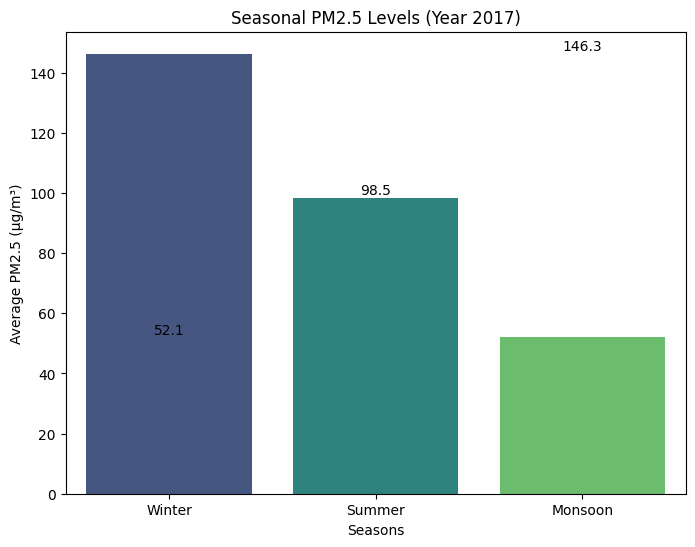

<ipython-input-197-e37b954a2f7e>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


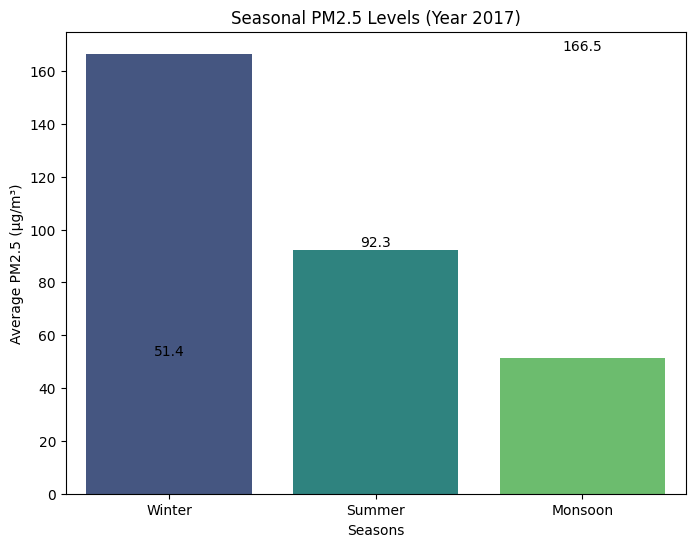

<ipython-input-197-e37b954a2f7e>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


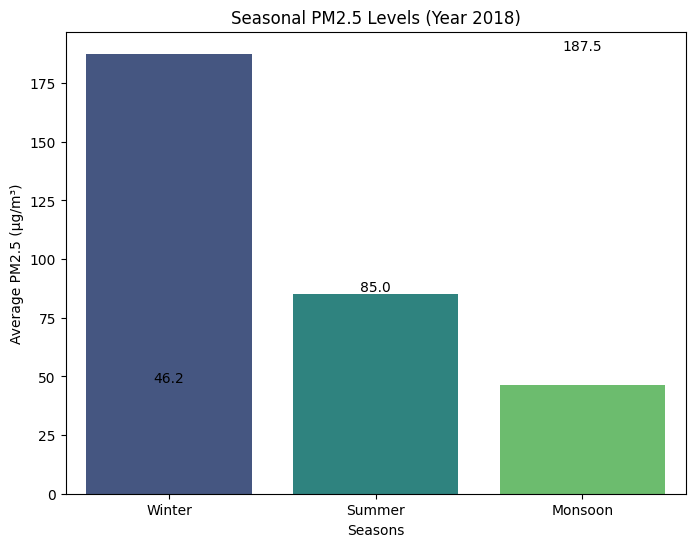

<ipython-input-197-e37b954a2f7e>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


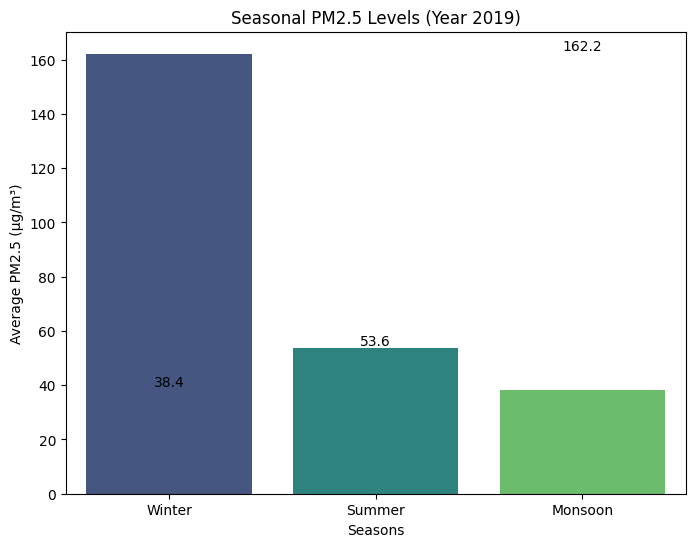

<ipython-input-197-e37b954a2f7e>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


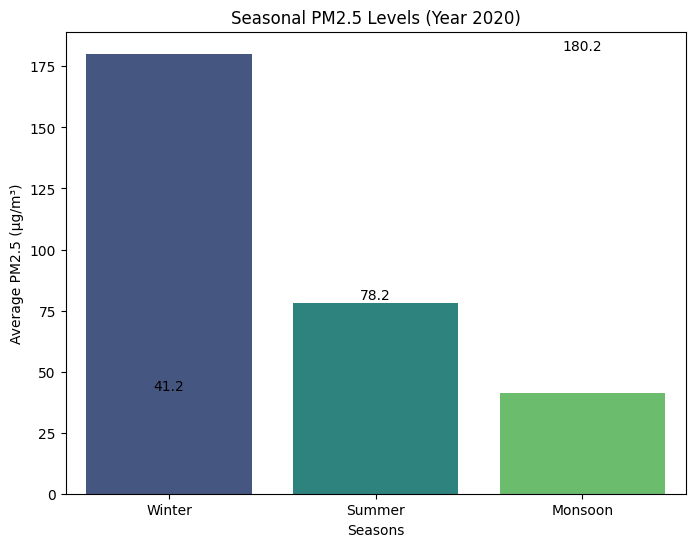

<ipython-input-197-e37b954a2f7e>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


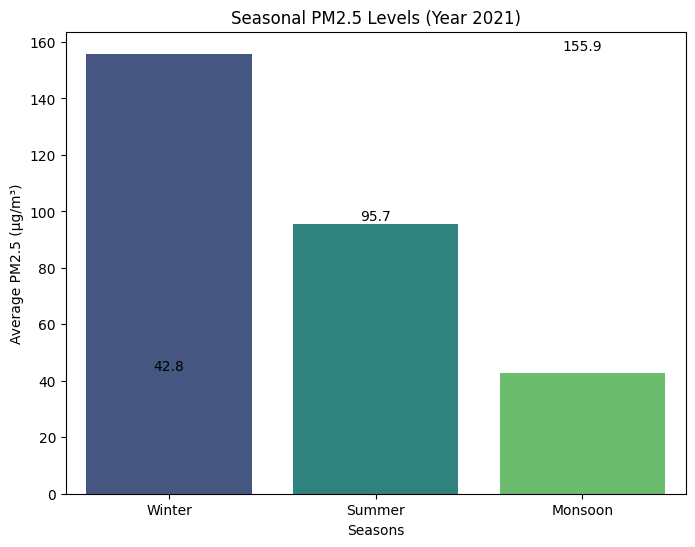

<ipython-input-197-e37b954a2f7e>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


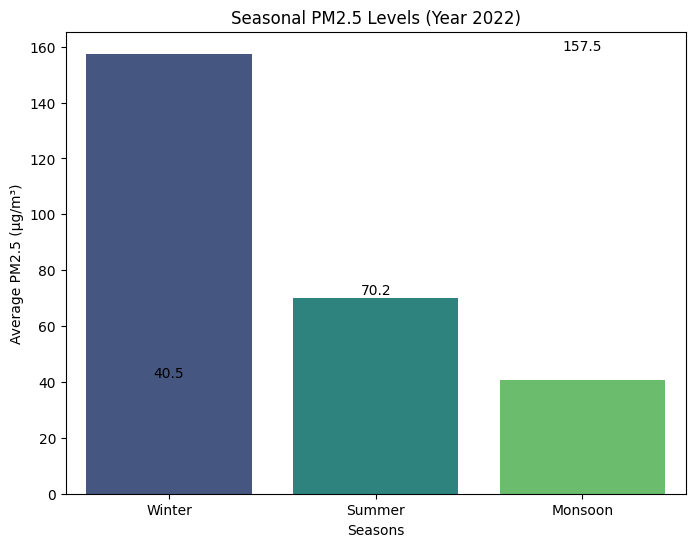

In [197]:
'''2) Plot the average PM2.5 levels for Delhi across each season (Winter: December-February,
 Summer: March-May, Monsoon: June-September)
 from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?'''

delhi_data = data[data['city'] == 'Delhi']
month_grp = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Summer', 4: 'Summer', 5: 'Summer',
    6: 'Monsoon', 7: 'Monsoon', 8: 'Monsoon', 9: 'Monsoon'
}

delhi_seas = delhi_data.copy()
delhi_seas['Seasons'] = delhi_seas['Timestamp'].dt.month.map(month_grp)

delhi_seas['Year'] = delhi_seas['Timestamp'].dt.year
delhi_seas.loc[delhi_seas['Timestamp'].dt.month == 12, 'Year'] += 1

delhi_yr = []
for i in range(2017, 2024):
    yearly_data = delhi_seas[delhi_seas['Year'] == i]
    delhi_yr.append(yearly_data)

for i, df in enumerate(delhi_yr):
    if df.empty: continue

    seasonal_avg = df.groupby('Seasons')['PM2.5'].mean().reset_index()

    plt.figure(figsize=(8,6))
    sns.barplot(
        x='Seasons',
        y='PM2.5',
        data=seasonal_avg,
        order=['Winter', 'Summer', 'Monsoon'],
        palette='viridis'
    )
    plt.title(f"Seasonal PM2.5 Levels (Year {df['Timestamp'].dt.year.iloc[1]})")
    plt.xlabel("Seasons")
    plt.ylabel("Average PM2.5 (µg/m³)")

    for index, row in seasonal_avg.iterrows():
        plt.text(index, row['PM2.5'], f"{row['PM2.5']:.1f}",
                ha='center', va='bottom', fontsize=10)

    plt.show()

It can clearly be seen that across the years 2017 to 2022 that there is higher amount of pollution in winter, followed by summer and least amount of pollution in monsoon.

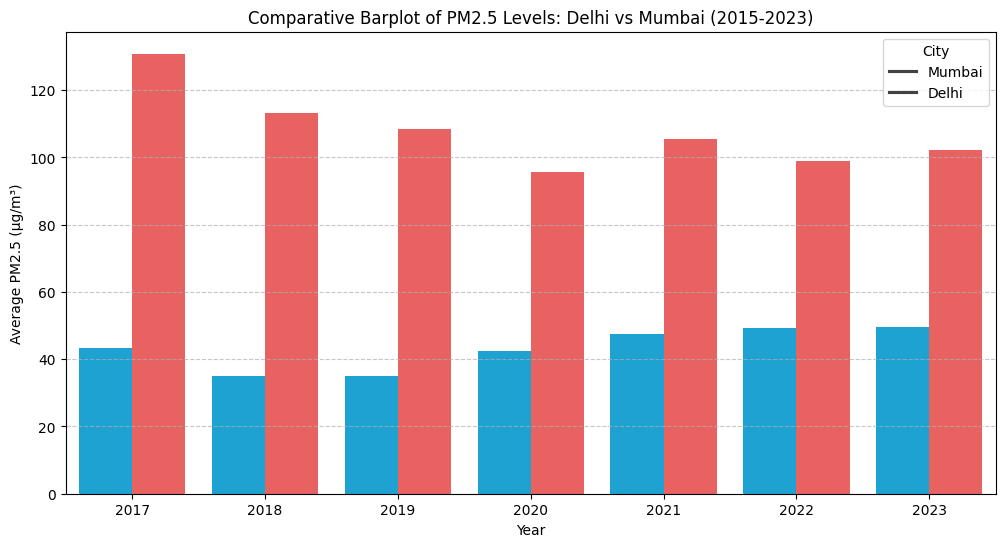

Mumbai's PM2.5 fluctuation (standard deviation): 40.18
Delhi's PM2.5 fluctuation (standard deviation): 84.93
Delhi had more fluctuations in PM2.5 levels.


In [206]:
'''3) Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023.
 Which city had more fluctuations? (Hint: Think what fluctuation means)'''
mumbai_data = data[data['city'] == 'Mumbai']
mum_yr = []
del_yr = []
for i in range(2015, 2024):
  mum_yr.append(mumbai_data[ mumbai_data['Timestamp'].dt.year == i ])
  del_yr.append(delhi_data[ delhi_data['Timestamp'].dt.year == i ])

mumbai_combined = pd.concat(mum_yr)
delhi_combined = pd.concat(del_yr)

mumbai_combined['Year'] = mumbai_combined['Timestamp'].dt.year
delhi_combined['Year'] = delhi_combined['Timestamp'].dt.year

mumbai_avg = mumbai_combined.groupby('Year')['PM2.5'].mean().reset_index()
delhi_avg = delhi_combined.groupby('Year')['PM2.5'].mean().reset_index()

comparison = pd.merge(mumbai_avg, delhi_avg, on='Year', suffixes=('_Mumbai', '_Delhi'))

plt.figure(figsize=(12, 6))
comparison_melted = comparison.melt(id_vars='Year', value_vars=['PM2.5_Mumbai', 'PM2.5_Delhi'],
                                    var_name='City', value_name='PM2.5')

sns.barplot(data=comparison_melted, x='Year', y='PM2.5', hue='City', palette=['#00B0F0', '#FF4B4B'])

plt.title('Comparative Barplot of PM2.5 Levels: Delhi vs Mumbai (2015-2023)')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.legend(title='City', labels=['Mumbai', 'Delhi'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

mumbai_std = mumbai_combined['PM2.5'].std()
delhi_std = delhi_combined['PM2.5'].std()

print(f"Mumbai's PM2.5 fluctuation (standard deviation): {mumbai_std:.2f}")
print(f"Delhi's PM2.5 fluctuation (standard deviation): {delhi_std:.2f}")

if mumbai_std > delhi_std:
    print("Mumbai had more fluctuations in PM2.5 levels.")
else:
    print("Delhi had more fluctuations in PM2.5 levels.")


In [201]:
mum_yr

[Empty DataFrame
 Columns: [Timestamp, station, PM2.5, PM10, address, city, latitude, longitude, state, Seasons]
 Index: [],
 Empty DataFrame
 Columns: [Timestamp, station, PM2.5, PM10, address, city, latitude, longitude, state, Seasons]
 Index: [],
         Timestamp                               station       PM2.5  \
 28     2017-01-01   Bandra Kurla Complex, Mumbai - IITM         NaN   
 29     2017-01-01   Bandra Kurla Complex, Mumbai - MPCB         NaN   
 30     2017-01-01                 Bandra, Mumbai - MPCB  118.202604   
 49     2017-01-01          Borivali East, Mumbai - IITM         NaN   
 50     2017-01-01          Borivali East, Mumbai - MPCB         NaN   
 ...           ...                                   ...         ...   
 204693 2017-12-31  Siddharth Nagar-Worli, Mumbai - IITM         NaN   
 204700 2017-12-31                   Sion, Mumbai - MPCB         NaN   
 204740 2017-12-31             Vasai West, Mumbai - MPCB         NaN   
 204754 2017-12-31        Vile

# **Population-Based [3 Marks]**

1)Which state in India has the highest number of monitoring stations relative to its population?

2)Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.

3)Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?
X-axis: Population density (people per square kilometer).
Y-axis: Average PM2.5 concentration.
Use a scatter plot to show the relationship, where each point represents a state.

In [207]:
!gdown --id 1scZsv_0bOXAqyYO1diPYpX5T_FM9ewtt

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1scZsv_0bOXAqyYO1diPYpX5T_FM9ewtt
To: /content/Copy of State_data.csv
100% 844/844 [00:00<00:00, 3.01MB/s]


In [210]:
pop_data = pd.read_csv('Copy of State_data.csv')
pop_data_original = pop_data

In [232]:
'''1)Which state in India has the highest number of monitoring stations relative to its population?'''
a = data.groupby('state')['station']
a = a.nunique()
st_pop = pd.merge(pop_data, a, left_on = 'State', right_on = 'state' )
st_pop['st_per_capita'] = st_pop['station'] / st_pop['Population']
st_pop

,State,Population,Area (km2),station,st_per_capita
0,Uttar Pradesh,199812341,240928,57,2.852677e-07
1,Maharashtra,112374333,307713,97,8.631864e-07
2,Bihar,104099452,94163,36,3.458231e-07
3,West Bengal,91276115,88752,22,2.410269e-07
4,Madhya Pradesh,72626809,308252,29,3.993016e-07
5,Tamil Nadu,72147030,130058,36,4.989810e-07
6,Rajasthan,68548437,342239,46,6.710583e-07
7,Karnataka,61095297,191791,42,6.874506e-07
8,Gujarat,60439692,196024,17,2.812721e-07
9,Andhra Pradesh,49577103,162975,13,2.622178e-07


In [221]:
c = pop_data[]

,State,Population,Area (km2)
0,Uttar Pradesh,199812341,240928
1,Maharashtra,112374333,307713
2,Bihar,104099452,94163
3,West Bengal,91276115,88752
4,Madhya Pradesh,72626809,308252
5,Tamil Nadu,72147030,130058
6,Rajasthan,68548437,342239
7,Karnataka,61095297,191791
8,Gujarat,60439692,196024
9,Andhra Pradesh,49577103,162975
